In [97]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



In [98]:
dataframe=pd.read_csv('D:/FOXMULA/creditcard.csv',header=0)

In [99]:
dataframe.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [100]:
#checking the size of dataset
dataframe.shape

(284807, 31)

In [101]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [102]:
dataframe.isnull().values.any()

False

In [103]:
# Checking distribution of numerical values in the dataset
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [104]:
dataframe.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [105]:
dataframe.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [106]:
dataframe.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [107]:
# Checking the class distribution of the target variable
dataframe['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [108]:
#checking the description about time attribute
dataframe['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [109]:
#checking the description about amount attribute
dataframe['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [110]:
#visualizing fraud and non-fraud transactions
Genuine = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percentage = (fraud / (fraud + Genuine)) * 100
print("Number of Genuine transactions: ", Genuine)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percentage))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


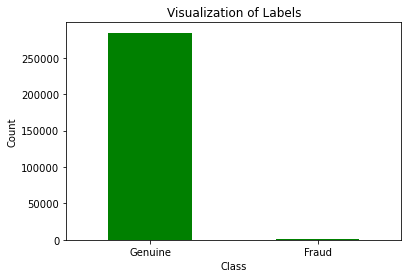

In [111]:
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar",color='g',rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

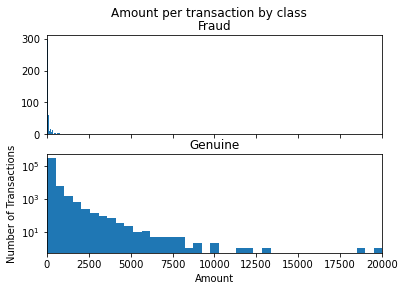

In [112]:
frauds = dataframe[dataframe.Class == 1]
normal = dataframe[dataframe.Class == 0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Genuine')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

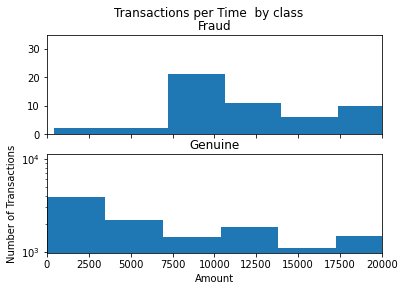

In [113]:
frauds = dataframe[dataframe.Class == 1]
normal = dataframe[dataframe.Class == 0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Transactions per Time  by class')

bins = 50

ax1.hist(frauds.Time, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Time, bins = bins)
ax2.set_title('Genuine')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [114]:
#checking correlation b/w attributes
corr=dataframe.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


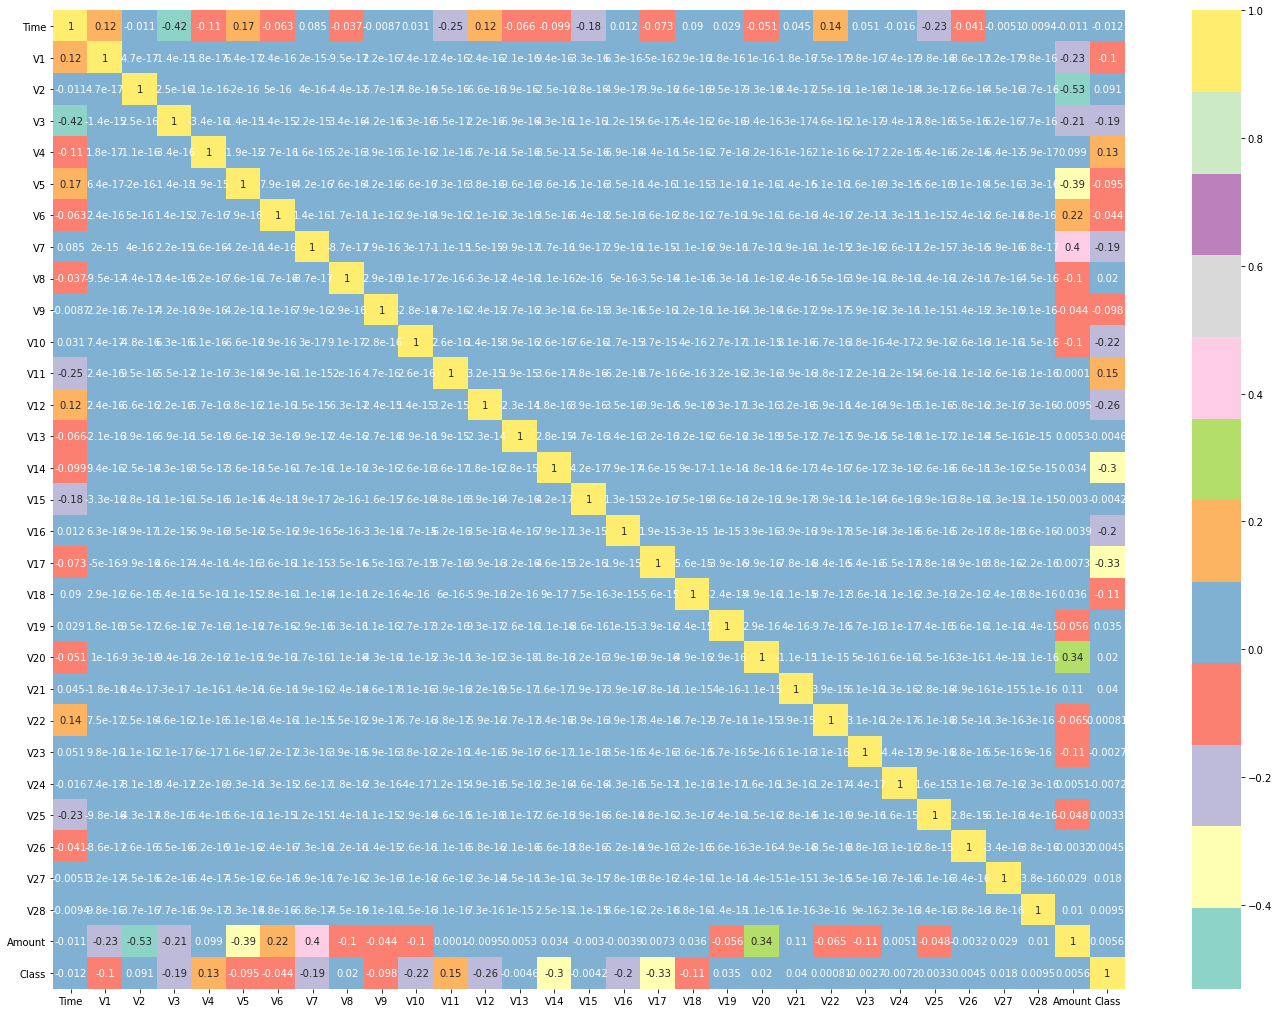

In [115]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap="Set3", annot=True)
plt.show()

In [116]:
# First, let’s drop the Time column as we can see from  the corr table the time attribute is not much related
#with other attributes and use the scikit’s StandardScaler on the Amount. 
#The scaler removes the mean and scales the values to unit variance
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

# Splitting the data into train & test data

In [117]:
# Splitting the dataset into X and y
y= dataframe["Class"]
X = dataframe.drop(["Class"], axis=1)

In [118]:
# Checking some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [119]:
# Checking some rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [120]:
# Splitting the dataset using train test split
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, y, test_size= 0.3, random_state= 100)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)
print("Shape of train_Y: ", train_Y.shape)
print("Shape of test_Y: ", test_Y.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)
Shape of train_Y:  (199364,)
Shape of test_Y:  (85443,)


In [121]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(train_Y))
print(np.sum(test_Y))

492
350
142


In [122]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

# LOGISTIC REGRESSION 

In [123]:
#logistic regression
from sklearn.linear_model import LogisticRegression
Logisticregression=LogisticRegression()
Logisticregression.fit(train_X,train_Y)
prediction_lr=Logisticregression.predict(test_X)
Logistic_reg_score=Logisticregression.score(test_X,test_Y)*100
print("Logistic Regression Score: ",Logistic_reg_score)

Logistic Regression Score:  99.9098814414288


In [124]:
#visualize the confusion matrix and the evaluation metrics of our Logistic regression  model.

Confusion Matrix - Logistic Regression
[[85274    27]
 [   50    92]]


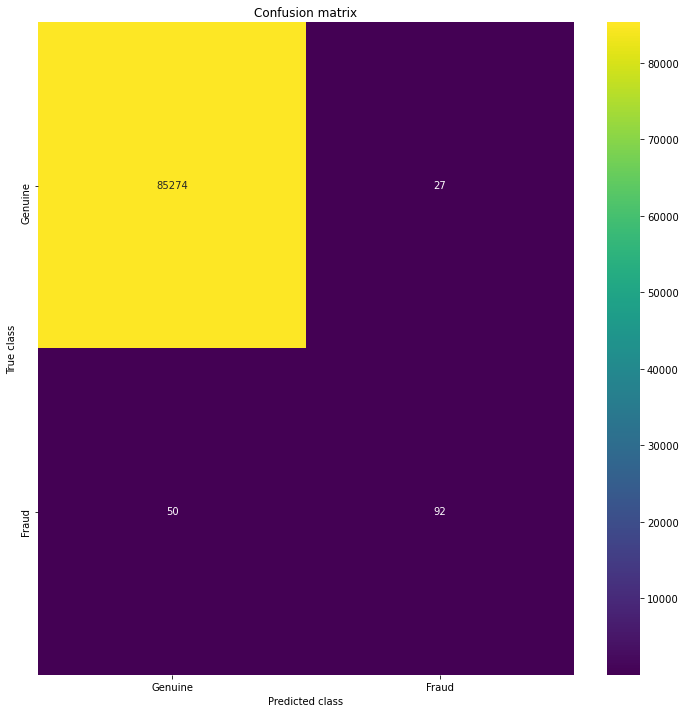

In [125]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(test_Y, prediction_lr)
print("Confusion Matrix - Logistic Regression")
print(cm_lr)

plt.figure(figsize=(12, 12))
sns.heatmap(cm_lr, xticklabels=['Genuine','Fraud'], yticklabels=['Genuine','Fraud'], annot=True, fmt="d",cmap='viridis');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [126]:
print("Evaluation of Logistic regression Model")
print()
metrics(test_Y, prediction_lr.round())

Evaluation of Logistic regression Model

Accuracy: 0.99910
Precision: 0.77311
Recall: 0.64789
F1-score: 0.70498


#  DECISION TREE

In [127]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.90402958697612


Confusion Matrix - Decision Tree
[[85255    46]
 [   36   106]]


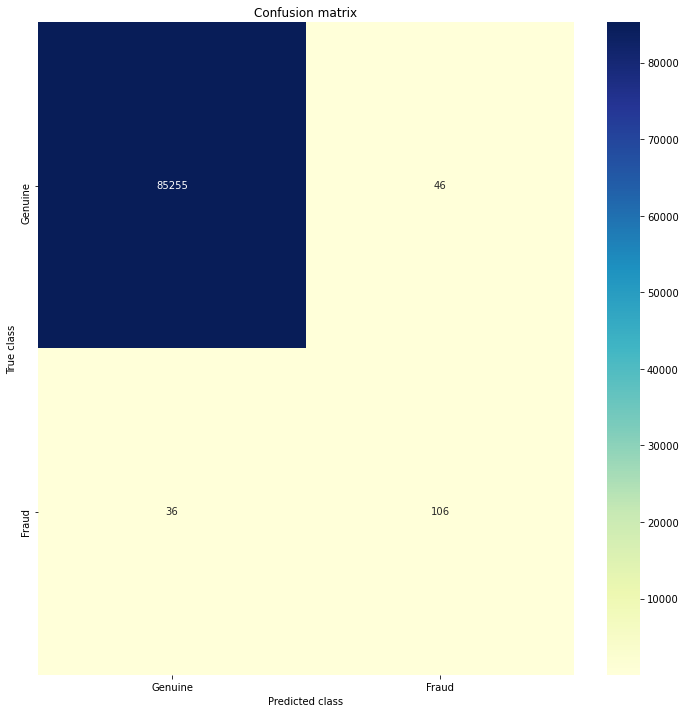

In [128]:
#visualize the confusion matrix and the evaluation metrics of our Decision tree model.
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(test_Y, predictions_dt)
print("Confusion Matrix - Decision Tree")
print(cm_dt)

plt.figure(figsize=(12, 12))
sns.heatmap(cm_dt, xticklabels=['Genuine','Fraud'], yticklabels=['Genuine','Fraud'], annot=True, fmt="d",cmap='YlGnBu');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [129]:
print("Evaluation of Decision tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision tree Model

Accuracy: 0.99904
Precision: 0.69737
Recall: 0.74648
F1-score: 0.72109


# RANDOM FOREST

In [130]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.94499256814484


Confusion Matrix - Random forest
[[85287    14]
 [   33   109]]


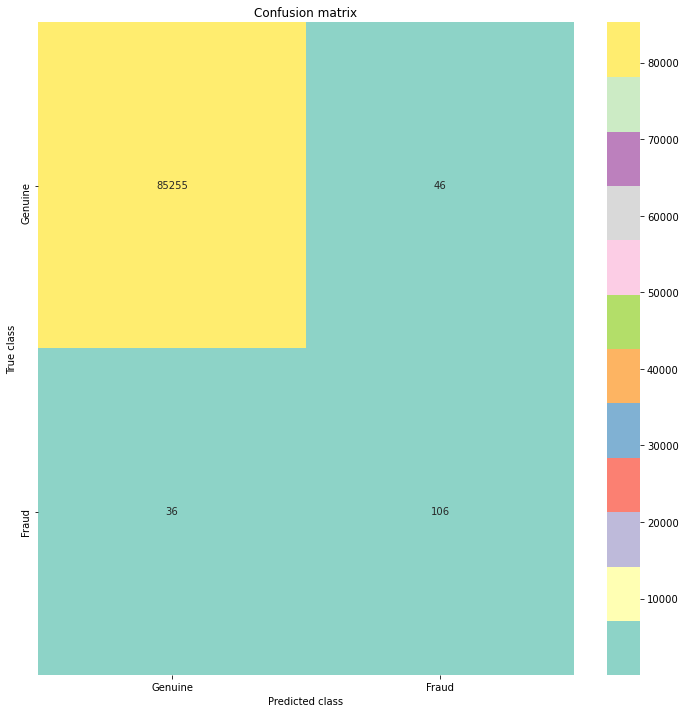

In [131]:
#visualize the confusion matrix and the evaluation metrics of our RANDOM FOREST model.
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(test_Y, predictions_rf)
print("Confusion Matrix - Random forest")
print(cm_rf)

plt.figure(figsize=(12, 12))
sns.heatmap(cm_dt, xticklabels=['Genuine','Fraud'], yticklabels=['Genuine','Fraud'], annot=True, fmt="d",cmap='Set3');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [132]:
print("Evaluation of Random forest")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random forest

Accuracy: 0.99945
Precision: 0.88618
Recall: 0.76761
F1-score: 0.82264


# SUPPORT VECTOR MACHINE

In [133]:

from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(train_X, train_Y)
  
prediction_svm= svc_model .predict(test_X)

svm_score = svc_model.score(test_X, test_Y) * 100
print("support vector machine Score: ", svm_score)

support vector machine Score:  99.9204147794436


Confusion Matrix - Support Vector Machine
[[85270    31]
 [   37   105]]


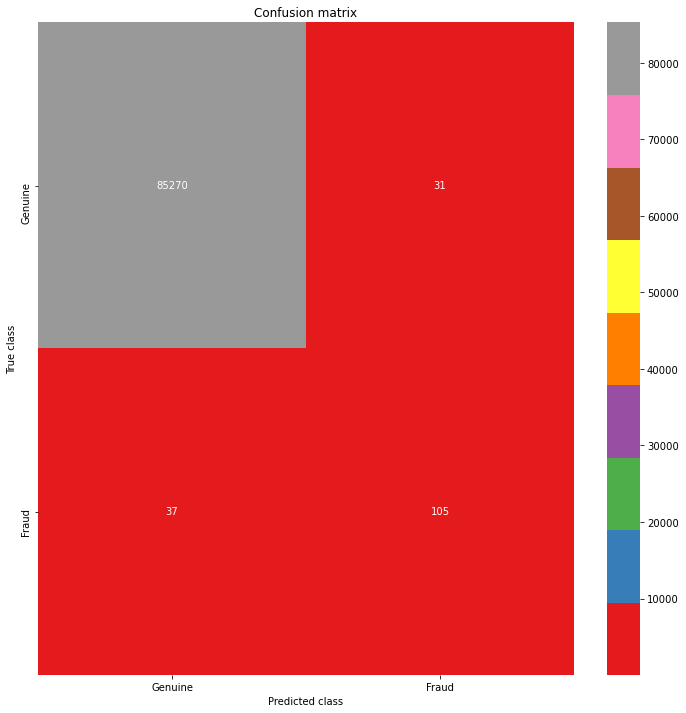

In [134]:
#visualize the confusion matrix and the evaluation metrics of our SVM model.
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(test_Y, prediction_svm)
print("Confusion Matrix - Support Vector Machine")
print(cm_svm)

plt.figure(figsize=(12, 12))
sns.heatmap(cm_svm, xticklabels=['Genuine','Fraud'], yticklabels=['Genuine','Fraud'], annot=True, fmt="d",cmap='Set1');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [135]:
print("Evaluation of SVM Model")
print()
metrics(test_Y, prediction_svm.round())

Evaluation of SVM Model

Accuracy: 0.99920
Precision: 0.77206
Recall: 0.73944
F1-score: 0.75540


# KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier 
#n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
#metric='minkowski': This is the default parameter and it decides the distance between the points.
#p=2: It is equivalent to the standard Euclidean metric.
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(train_X, train_Y)
prediction_knn= knn.predict(test_X)

knn_score = knn.score(test_X, test_Y) * 100
print("KNN Score: ", knn_score)

KNN Score:  99.93562960102057


Confusion Matrix - KNN
[[85280    21]
 [   34   108]]


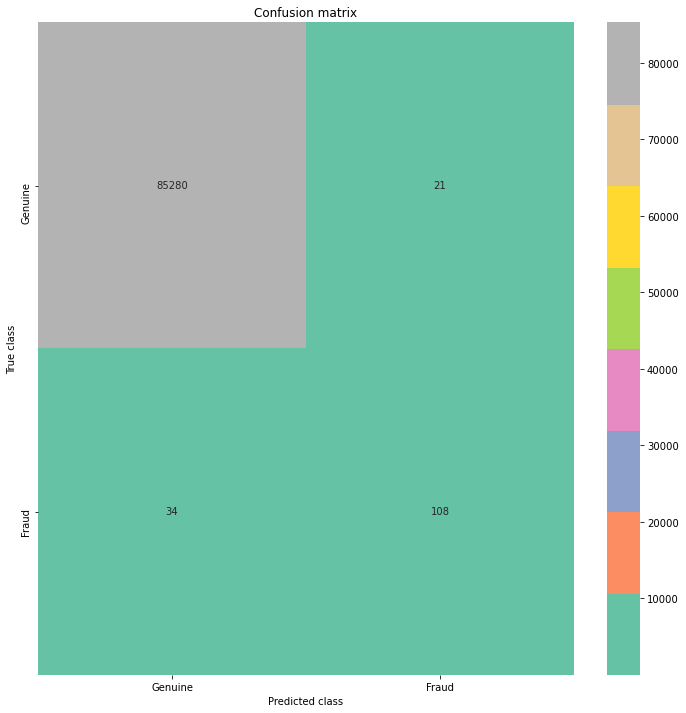

In [137]:
#visualize the confusion matrix and the evaluation metrics of our KNN model.
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(test_Y, prediction_knn)
print("Confusion Matrix - KNN")
print(cm_knn)

plt.figure(figsize=(12, 12))
sns.heatmap(cm_knn, xticklabels=['Genuine','Fraud'], yticklabels=['Genuine','Fraud'], annot=True, fmt="d",cmap='Set2');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [138]:
print("Evaluation of KNN Model")
print()
metrics(test_Y, prediction_knn.round())

Evaluation of KNN Model

Accuracy: 0.99936
Precision: 0.83721
Recall: 0.76056
F1-score: 0.79705


# BOOSTING

In [139]:
!pip3 install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [140]:
xgb=XGBClassifier(max_deapth=4)
xgb.fit(train_X,train_Y)
prediction_xgb= xgb.predict(test_X)

xgb_score = xgb.score(test_X, test_Y) * 100
print("XGB Score: ", xgb_score)

[23:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_deapth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGB Score:  99.94967405170698


Confusion Matrix - XGB
[[85291    10]
 [   33   109]]


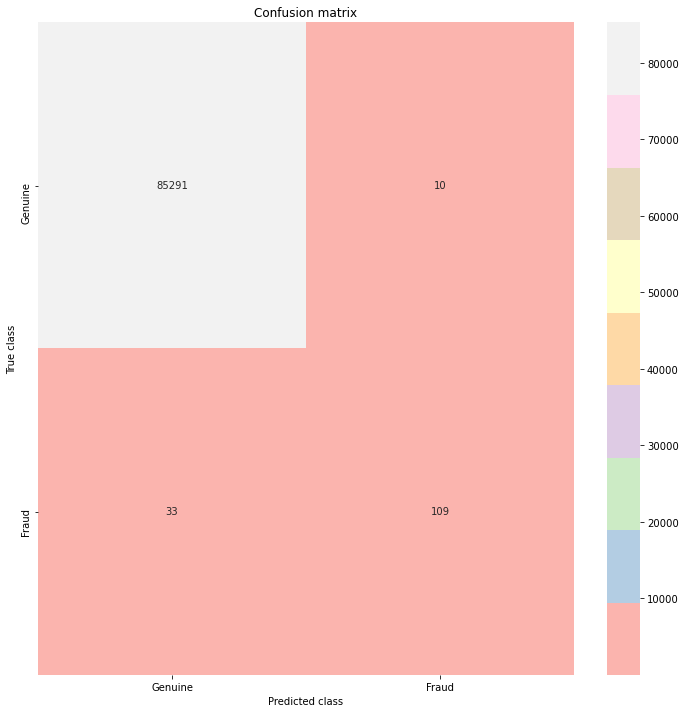

In [141]:
#visualize the confusion matrix and the evaluation metrics of our KNN model.
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(test_Y, prediction_xgb)
print("Confusion Matrix - XGB")
print(cm_xgb)

plt.figure(figsize=(12, 12))
sns.heatmap(cm_xgb, xticklabels=['Genuine','Fraud'], yticklabels=['Genuine','Fraud'], annot=True, fmt="d",cmap='Pastel1');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [142]:
print("Evaluation of XGB Model")
print()
metrics(test_Y, prediction_xgb.round())

Evaluation of XGB Model

Accuracy: 0.99950
Precision: 0.91597
Recall: 0.76761
F1-score: 0.83525


# Conclusion
In the above of all the models we build, found that the XGBOOST model gave us the best accuracy and best metrics of all.

XGboost Accuracy: 0.99950